In [8]:
import sys
%matplotlib notebook

sys.path.append('./utils/')
import numpy as np
import cv2
import gdal
import json
import loadcoraldata_utils as coralutils

import NeMO_layers
from NeMO_losses import charbonnierLoss
from keras.models import Model, Sequential, load_model

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

cloudmodel = load_model('./tmp/RefineMask_Cloud.h5', custom_objects={'BilinearUpSampling2D':NeMO_layers.BilinearUpSampling2D, 'charbonnierLoss': charbonnierLoss})

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


<IPython.core.display.Javascript object>


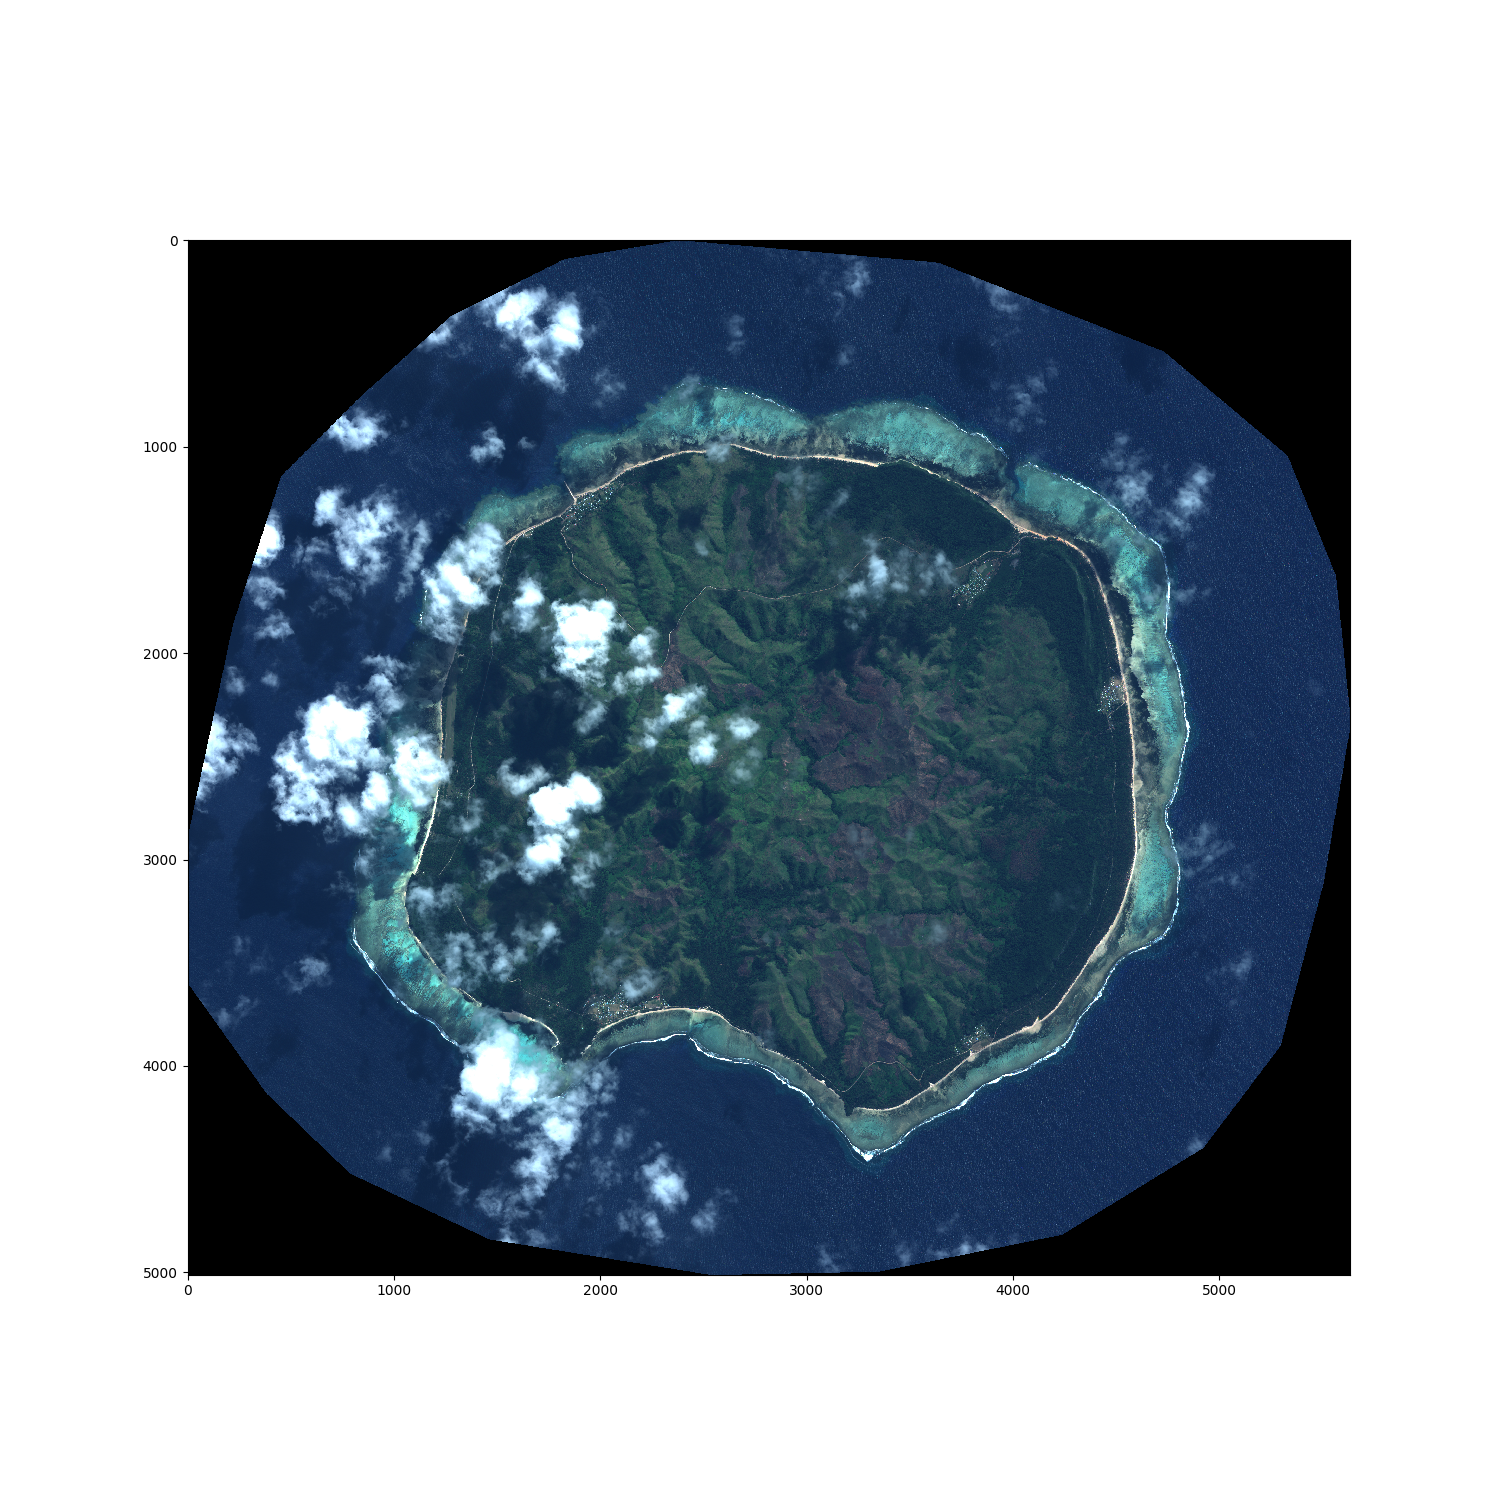

<IPython.core.display.Javascript object>


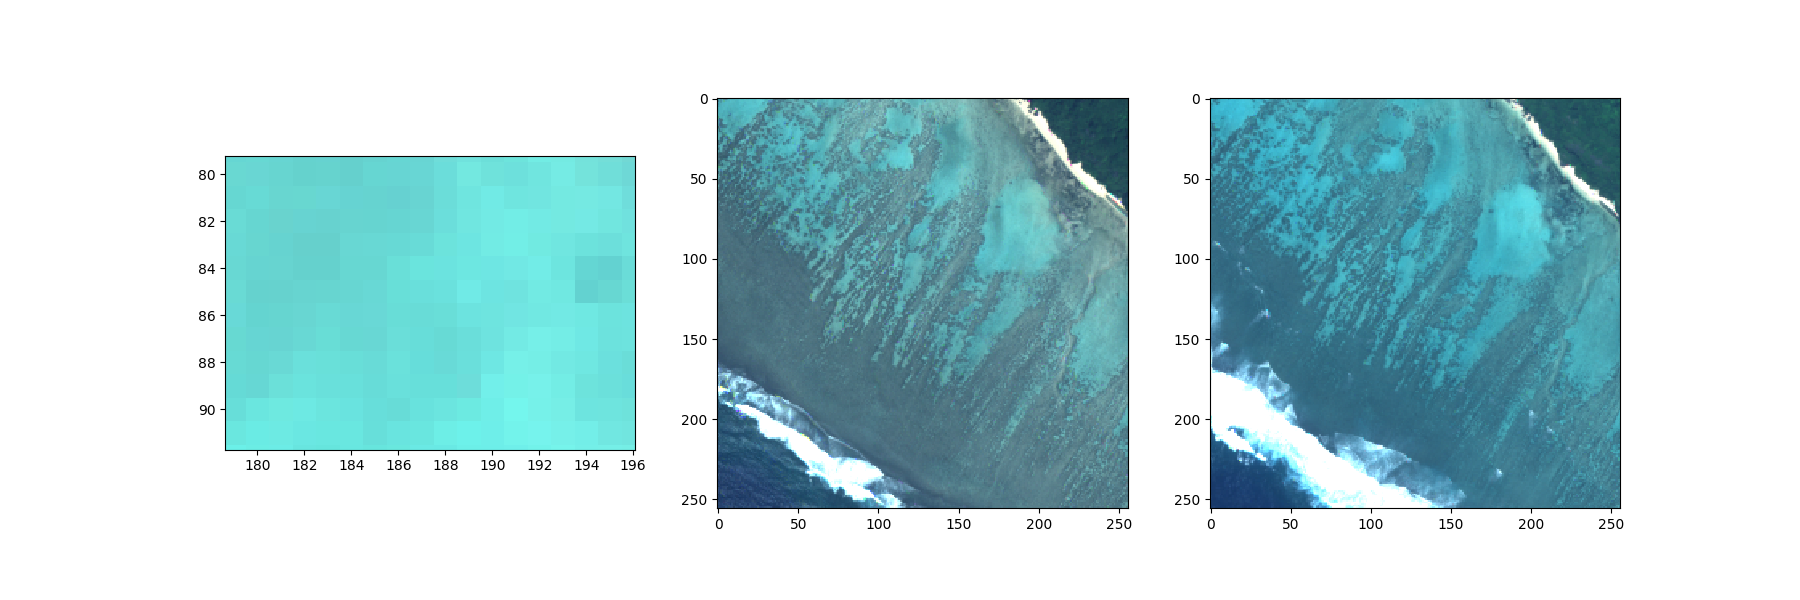

<IPython.core.display.Javascript object>


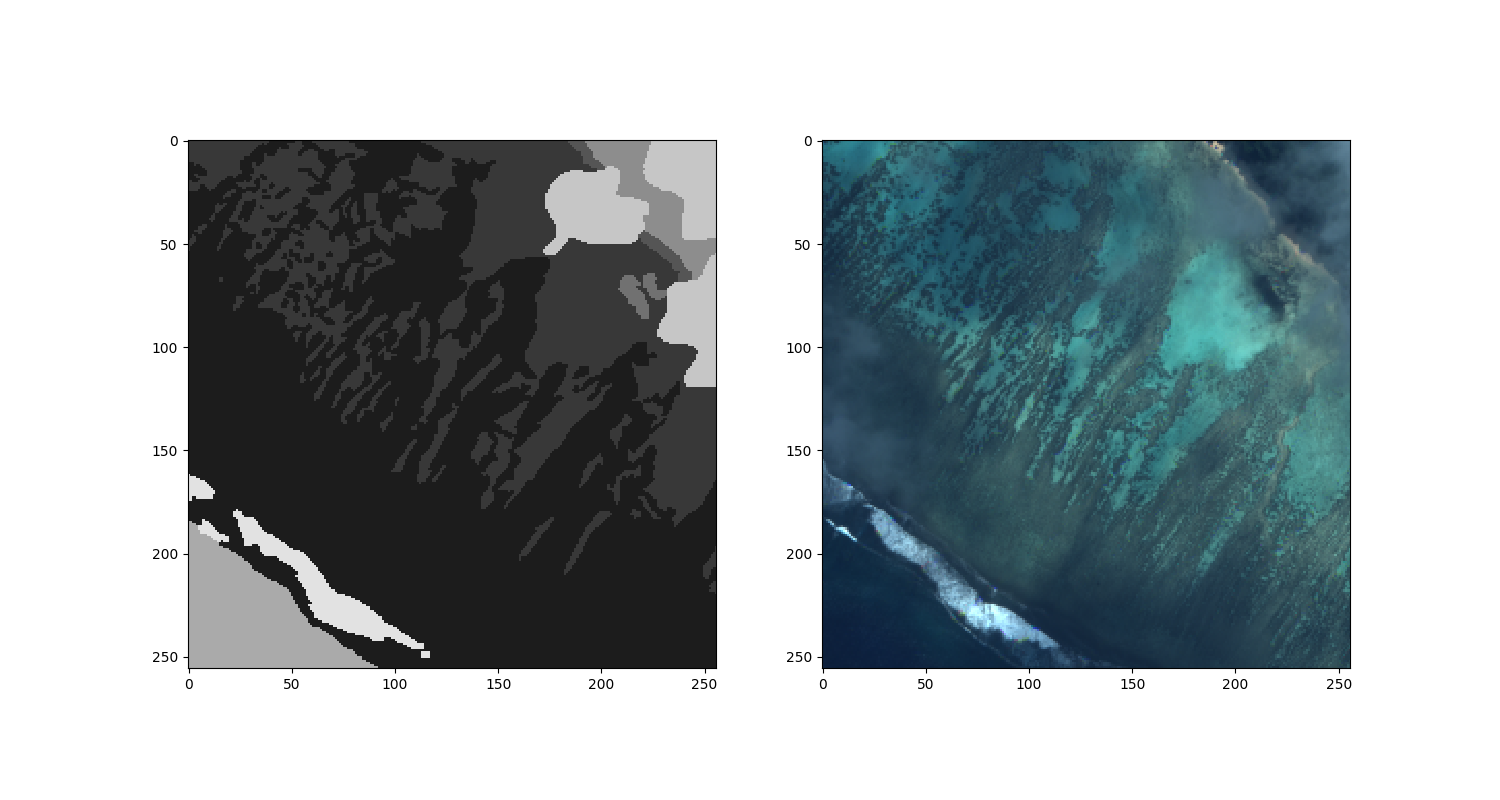

In [42]:
Cicia1 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_001.TIF'
Cicia2 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_002.TIF'
Cicia3 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_003.TIF'
Cicia_original = '/home/shared/NeMO-Net Data/KSLOF-CICIA-FIJI/Cicia_Satellite_image_mosaic_KSLOF.tif'
Cicia_truthpath = '/home/shared/NeMO-Net Data/KSLOF-CICIA-FIJI/Cicia_Habitat_classes_raster_KSLOF.tif'
submission_realpath = '/home/asli/NeMO-Test/NeMO-NET/Images/Jarrett_submissions/Patches/'
submission_truthpath = '/home/asli/NeMO-Test/NeMO-NET/Images/Jarrett_submissions/Truthmaps_Gray/'
patchimg = 'Coral_00000002'

jsonpath = './utils/CoralClasses.json'

with open(jsonpath) as json_file:
    json_data = json.load(json_file)

Cicia1 = coralutils.CoralData(Cicia1, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Cicia2 = coralutils.CoralData(Cicia2, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Cicia3 = coralutils.CoralData(Cicia3, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")

patchtruth = cv2.imread(submission_truthpath+patchimg+'.png')
patch = coralutils.CoralData(submission_realpath+patchimg+'.tif', load_type="raster")

xstart = 878
xlen = 256
ystart = 3376
ylen = 256

offset = 128
xstart = xstart+offset
ystart = ystart+offset

fig = plt.figure(1, figsize=(15,15))
ax = plt.subplot(111)
Cicia1_RGB = 255/200*np.rollaxis(np.asarray([Cicia1.image[:,:,4], Cicia1.image[:,:,2], Cicia1.image[:,:,1]]),0,3)
Cicia1_RGB[Cicia1_RGB > 255] = 255
Cicia1_RGB = np.asarray(Cicia1_RGB, dtype=np.uint8)
ax.imshow(Cicia1_RGB)

# ax = plt.subplot(122)
# Cicia3_RGB = 255/200*np.rollaxis(np.asarray([Cicia3.image[:,:,4], Cicia3.image[:,:,2], Cicia3.image[:,:,1]]),0,3)
# Cicia3_RGB[Cicia3_RGB > 255] = 255
# Cicia3_RGB = np.asarray(Cicia3_RGB, dtype=np.uint8)
# ax.imshow(Cicia3_RGB)

fig = plt.figure(2,figsize=(18,6))
Testimage1 = Cicia1.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
Testimage1_RGB = 255/200*np.rollaxis(np.asarray([Testimage1[:,:,4], Testimage1[:,:,2], Testimage1[:,:,1]]),0,3)
Testimage1_RGB[Testimage1_RGB > 255] = 255
Testimage1_RGB = np.asarray(Testimage1_RGB, dtype=np.uint8)
ax = plt.subplot(131)
ax.imshow(Testimage1_RGB)

Testimage2 = Cicia2.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
Testimage2_RGB = 255/200*np.rollaxis(np.asarray([Testimage2[:,:,4], Testimage2[:,:,2], Testimage2[:,:,1]]),0,3)
Testimage2_RGB[Testimage2_RGB > 255] = 255
Testimage2_RGB = np.asarray(Testimage2_RGB, dtype=np.uint8)
ax = plt.subplot(132)
ax.imshow(Testimage2_RGB)

Testimage3 = Cicia3.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
Testimage3_RGB = 255/200*np.rollaxis(np.asarray([Testimage3[:,:,4], Testimage3[:,:,2], Testimage3[:,:,1]]),0,3)
Testimage3_RGB[Testimage3_RGB > 255] = 255
Testimage3_RGB[Testimage3_RGB < 0] = 0
Testimage3_RGB = np.asarray(Testimage3_RGB, dtype=np.uint8)
ax = plt.subplot(133)
ax.imshow(Testimage3_RGB)

fig = plt.figure(3,figsize=(15,8))
patch_RGB = 100*np.rollaxis(np.asarray([patch.image[:,:,4], patch.image[:,:,2], patch.image[:,:,1]]),0,3)+100
patch_RGB[patch_RGB > 255] = 255
patch_RGB[patch_RGB < 0] = 0
patch_RGB = np.asarray(patch_RGB, dtype=np.uint8)
ax = plt.subplot(121)
ax.imshow(patchtruth)
ax = plt.subplot(122)
ax.imshow(patch_RGB)


# hsv = cv2.cvtColor(Testimage1_RGB, cv2.COLOR_RGB2HSV)
# edges1 = cv2.Canny(Cicia1_RGB,150,175)
# edges3 = cv2.Canny(Cicia3_RGB,150,175)
# fig = plt.figure(3,figsize=(30,15))
# ax = plt.subplot(121)
# ax.imshow(edges1)
# ax = plt.subplot(122)
# ax.imshow(edges3)

# fig = plt.figure(3,figsize=(18,6))
# Testimage_random = Testimage1+20
# Testimage_random = 255/200*np.rollaxis(np.asarray([Testimage_random[:,:,4], Testimage_random[:,:,2], Testimage_random[:,:,1]]),0,3)
# Testimage_random[Testimage_random > 255] = 255
# Testimage_random = np.asarray(Testimage_random, dtype=np.uint8)
# ax = plt.subplot(111)
# ax.imshow(Testimage_random)


<IPython.core.display.Javascript object>


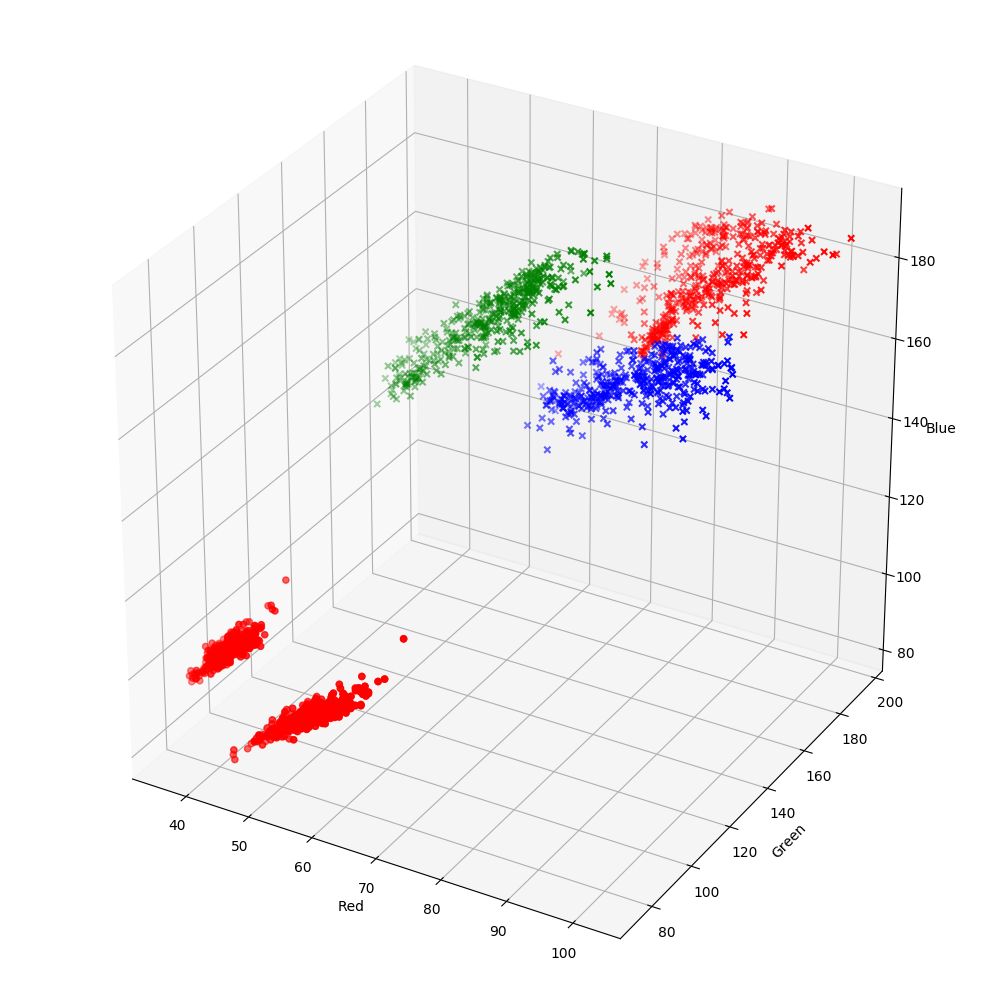

In [43]:
sg_ystart = 520
sg_xstart = 131
sg_ylen = 20
sg_xlen = 20

sed_ystart = 80
sed_xstart = 180
sed_ylen = 20
sed_xlen = 20

veg_ystart = 0
veg_xstart = 204
veg_ylen = 20
veg_xlen = 20

ocn_ystart = 230
ocn_xstart = 14
ocn_ylen = 20
ocn_xlen = 20

coral_ystart = 170
coral_xstart = 94
coral_ylen = 20
coral_xlen = 20

ystart1 = 455
ylen1 = 200
xstart1 = 300
xlen1 = 200

sample_sg_pts1 = Testimage1[sg_ystart:sg_ystart+sg_ylen,sg_xstart:sg_xstart+sg_xlen,:]
sample_sg_pts2 = Testimage2[sg_ystart:sg_ystart+sg_ylen,sg_xstart:sg_xstart+sg_xlen,:]
sample_sg_pts3 = Testimage3[sg_ystart:sg_ystart+sg_ylen,sg_xstart:sg_xstart+sg_xlen,:]
sample_sed_pts1 = Testimage1[sed_ystart:sed_ystart+sed_ylen,sed_xstart:sed_xstart+sed_xlen,:]
sample_sed_pts2 = Testimage2[sed_ystart:sed_ystart+sed_ylen,sed_xstart:sed_xstart+sed_xlen,:]
sample_sed_pts3 = Testimage3[sed_ystart:sed_ystart+sed_ylen,sed_xstart:sed_xstart+sed_xlen,:]
sample_veg_pts1 = Testimage1[veg_ystart:veg_ystart+veg_ylen,veg_xstart:veg_xstart+veg_xlen,:]
sample_veg_pts2 = Testimage2[veg_ystart:veg_ystart+veg_ylen,veg_xstart:veg_xstart+veg_xlen,:]
sample_veg_pts3 = Testimage3[veg_ystart:veg_ystart+veg_ylen,veg_xstart:veg_xstart+veg_xlen,:]
sample_ocn_pts1 = Testimage1[ocn_ystart:ocn_ystart+ocn_ylen,ocn_xstart:ocn_xstart+ocn_xlen,:]
sample_ocn_pts2 = Testimage2[ocn_ystart:ocn_ystart+ocn_ylen,ocn_xstart:ocn_xstart+ocn_xlen,:]
sample_ocn_pts3 = Testimage3[ocn_ystart:ocn_ystart+ocn_ylen,ocn_xstart:ocn_xstart+ocn_xlen,:]
sample_coral_pts1 = Testimage1[coral_ystart:coral_ystart+coral_ylen,coral_xstart:coral_xstart+coral_xlen,:]
sample_coral_pts2 = Testimage1[coral_ystart:coral_ystart+coral_ylen,coral_xstart:coral_xstart+coral_xlen,:]
sample_coral_pts3 = Testimage3[coral_ystart:coral_ystart+coral_ylen,coral_xstart:coral_xstart+coral_xlen,:]



# edge_pts1 = edges1[1000:2000,3500:4500]
# edge_pts1 = Cicia1.image[1000:2000,3500:4500,:][edge_pts1 > 0]
# edge_pts3 = edges3[1000:2000,3500:4500]
# edge_pts3 = Cicia3.image[1000:2000,3500:4500,:][edge_pts3 > 0]
# print(edge_pts1.shape)
# print(edge_pts3.shape)

fig = plt.figure(4,figsize=(10,10))
ax = Axes3D(fig)
# edge_numstart = 10000
# edge_numend = 20000
# ax.scatter(edge_pts1[:,4], edge_pts1[:,2], edge_pts1[:,1], c='r')
# ax.scatter(edge_pts3[:,4], edge_pts3[:,2]-9, edge_pts3[:,1]-8, c='g')

# print(np.median(edge_pts1[:,:], axis=0))
# print(np.median(edge_pts3[:,:], axis=0))

# ax.scatter(sample_sg_pts1[:,:,4].flatten(), sample_sg_pts1[:,:,2].flatten(), sample_sg_pts1[:,:,1].flatten(), c='r', marker='o')
# ax.scatter(sample_sg_pts2[:,:,4].flatten(), sample_sg_pts2[:,:,2].flatten(), sample_sg_pts2[:,:,1].flatten(), c='b', marker='o')
# ax.scatter(sample_sg_pts3[:,:,4].flatten(), sample_sg_pts3[:,:,2].flatten(), sample_sg_pts3[:,:,1].flatten(), c='g', marker='o')

ax.scatter(sample_sed_pts1[:,:,4].flatten(), sample_sed_pts1[:,:,2].flatten(), sample_sed_pts1[:,:,1].flatten(), c='r', marker='x')
ax.scatter(sample_sed_pts2[:,:,4].flatten(), sample_sed_pts2[:,:,2].flatten(), sample_sed_pts2[:,:,1].flatten(), c='b', marker='x')
ax.scatter(sample_sed_pts3[:,:,4].flatten(), sample_sed_pts3[:,:,2].flatten(), sample_sed_pts3[:,:,1].flatten(), c='g', marker='x')

ax.scatter(sample_coral_pts1[:,:,4].flatten(), sample_coral_pts1[:,:,2].flatten(), sample_coral_pts1[:,:,1].flatten(), c='r', marker='o')
ax.scatter(sample_coral_pts2[:,:,4].flatten(), sample_coral_pts2[:,:,2].flatten(), sample_coral_pts2[:,:,1].flatten(), c='b', marker='o')
ax.scatter(sample_coral_pts3[:,:,4].flatten(), sample_coral_pts3[:,:,2].flatten(), sample_coral_pts3[:,:,1].flatten(), c='g', marker='o')

# print(np.median(np.reshape(sample_sg_pts1, (-1,8)), axis=0))
# print(np.median(np.reshape(sample_sg_pts3, (-1,8)), axis=0))

# ax.scatter(sample_veg_pts1[:,:,4].flatten(), sample_veg_pts1[:,:,2].flatten(), sample_veg_pts1[:,:,1].flatten(), c='r', marker='^')
# ax.scatter(sample_veg_pts2[:,:,4].flatten(), sample_veg_pts2[:,:,2].flatten(), sample_veg_pts2[:,:,1].flatten(), c='b', marker='^')
# ax.scatter(sample_veg_pts3[:,:,4].flatten(), sample_veg_pts3[:,:,2].flatten(), sample_veg_pts3[:,:,1].flatten(), c='g', marker='^')

# ax.scatter(sample_ocn_pts1[:,:,4].flatten(), sample_ocn_pts1[:,:,2].flatten(), sample_ocn_pts1[:,:,1].flatten(), c='r', marker='P')
# ax.scatter(sample_ocn_pts2[:,:,4].flatten(), sample_ocn_pts2[:,:,2].flatten(), sample_ocn_pts2[:,:,1].flatten(), c='b', marker='P')
# ax.scatter(sample_ocn_pts3[:,:,4].flatten(), sample_ocn_pts3[:,:,2].flatten(), sample_ocn_pts3[:,:,1].flatten(), c='g', marker='P')


ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()
                                  

[68.80876923 57.27814865 30.87549973 19.1742382  12.74969769  8.42578888
  4.76144695  2.52846384]


<IPython.core.display.Javascript object>


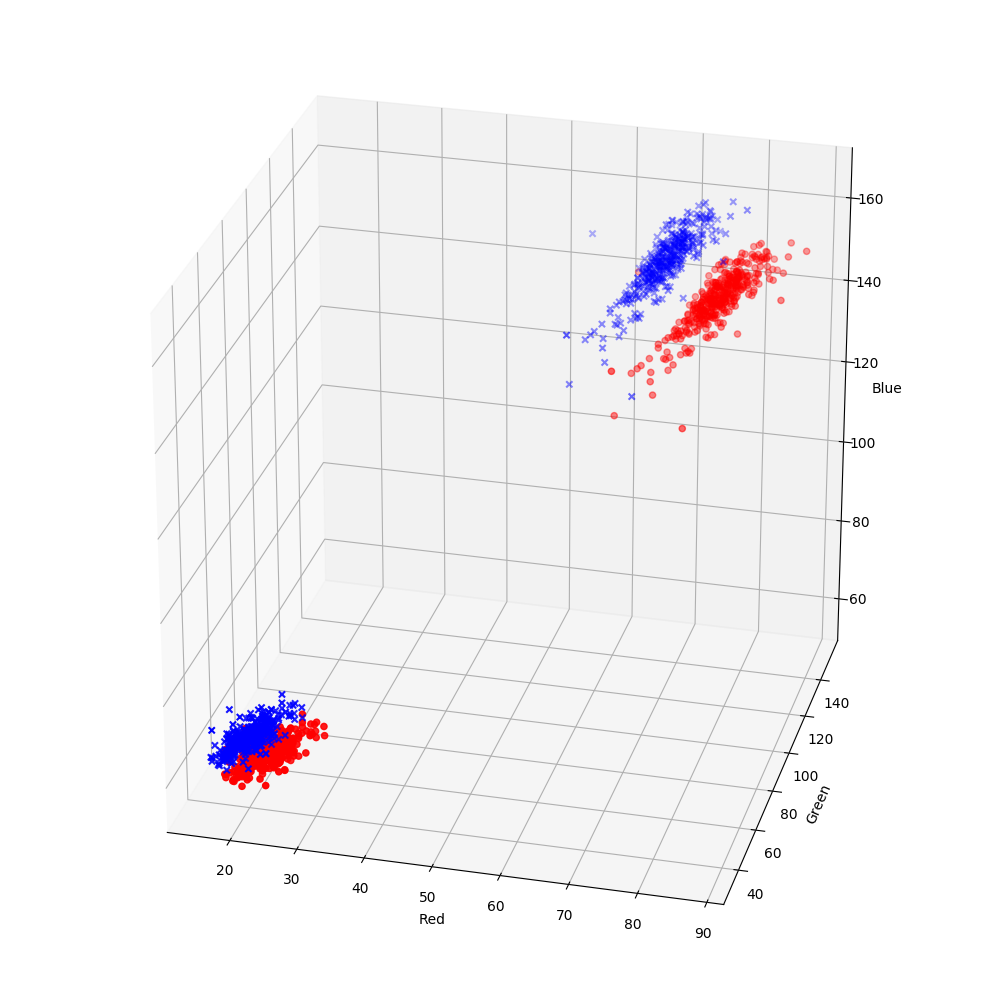

0.037789582825163426 0
0.08593327156807401 0
-0.07614162138594288 0
-0.03769156808949792 3
0.08757454830159384 2
0.12845164670323983 3
-0.12649914590423728 1
0.13428507285021074 3
[113.63871765 135.49668884 133.72567749 100.21252441  71.65329742
  25.27736664   8.53776741   3.61209106]
[117.93307738 147.1403626  123.54358759 100.22004674  65.37829227
  25.17573291   8.24143901   2.86856013]


In [76]:
mod_pts = np.copy(np.concatenate((sample_sg_pts1.reshape(-1,8), sample_sed_pts1.reshape(-1,8)), axis=0))
mod_testimage = np.copy(Cicia1.image[ystart:ystart+ylen,xstart:xstart+xlen,:])
ori_testimage = np.copy(Cicia1.image[ystart:ystart+ylen,xstart:xstart+xlen,:])
print(ori_testimage[0,0,:])

fig = plt.figure(5,figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(mod_pts[:,4], mod_pts[:,2], mod_pts[:,1], c='r', marker='o')

for ch in range(0,mod_pts.shape[1]):
    alpha = np.random.uniform(-0.25, 0.25)
    b = np.random.randint(0,4)
    print(alpha,b)
    if b == 0:
        mod_pts[:,ch] = mod_pts[:,ch] + alpha*mod_pts[:,ch]
        mod_testimage[:,:,ch] = mod_testimage[:,:,ch] + alpha*mod_testimage[:,:,ch]
    elif b == 1:
        mod_pts[:,ch] = mod_pts[:,ch] + alpha*20/mod_pts[:,ch]
        mod_testimage[:,:,ch] = mod_testimage[:,:,ch] + alpha*20/mod_testimage[:,:,ch]
    elif b == 2:
        mod_pts[:,ch] = mod_pts[:,ch] - alpha*mod_pts[:,ch]
        mod_testimage[:,:,ch] = mod_testimage[:,:,ch] - alpha*mod_testimage[:,:,ch]
    elif b == 3:
        mod_pts[:,ch] = mod_pts[:,ch] - alpha*20/mod_pts[:,ch]
        mod_testimage[:,:,ch] = mod_testimage[:,:,ch] - alpha*20/mod_testimage[:,:,ch]
    

# print(ori_testimage[360,350,:])
# print(mod_testimage[360,350,:])


ax.scatter(mod_pts[:,4], mod_pts[:,2], mod_pts[:,1], c='b', marker='x')
# ax.scatter(ori_testimage[:,:,4], ori_testimage[:,:,2], ori_testimage[:,:,1], c='r', marker='o')
# ax.scatter(mod_testimage[:,:,4], mod_testimage[:,:,2], mod_testimage[:,:,1], c='b', marker='x')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

<IPython.core.display.Javascript object>


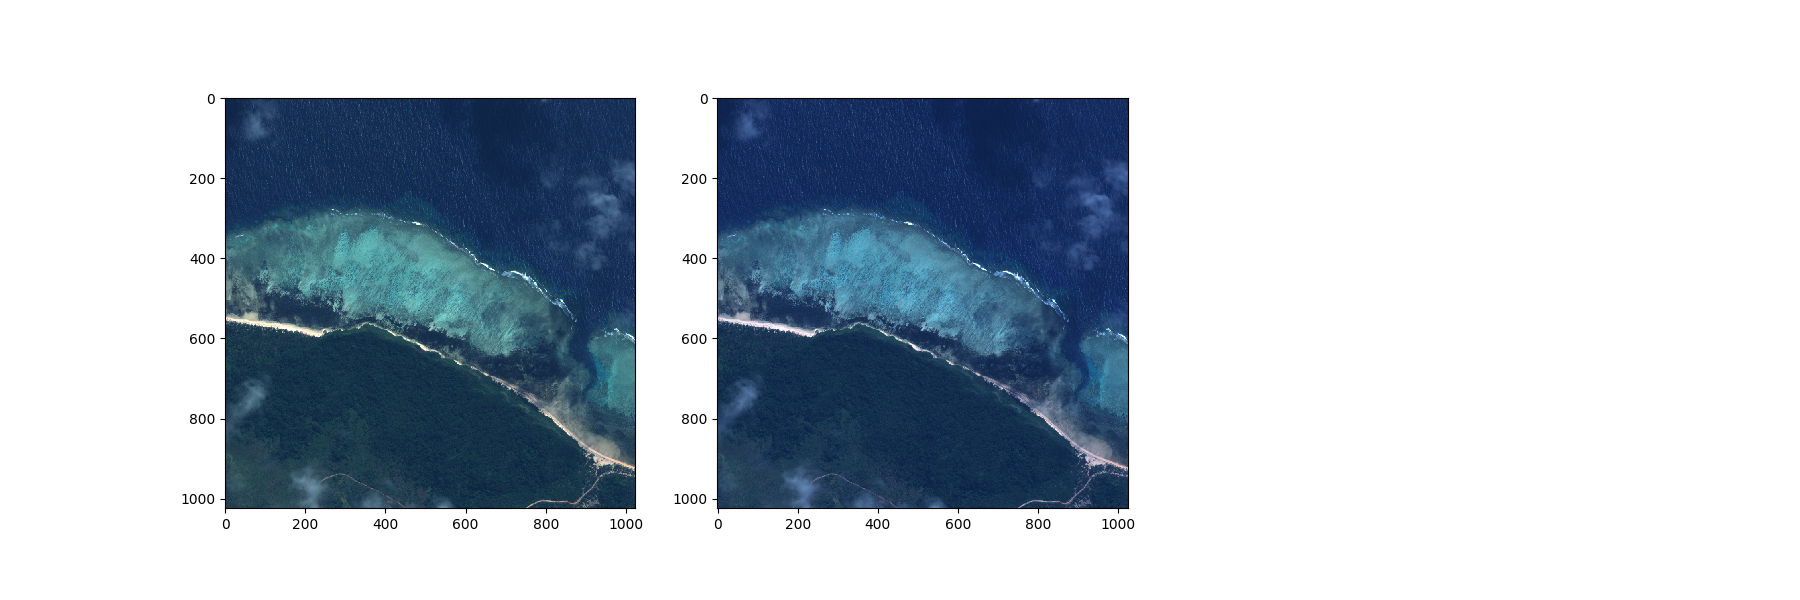

[111.81424713 129.02980042 128.20489502 102.92586517  70.37833405
  30.17964363   9.68708229   5.29773378]
[116.03966088 140.11775329 118.44316644 102.9331892   64.21498323
  30.09451894   9.4259115    4.79078089]


In [77]:
fig = plt.figure(6,figsize=(18,6))
Testimage1 = Cicia1.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
Testimage1_RGB = 255/200*np.rollaxis(np.asarray([Testimage1[:,:,4], Testimage1[:,:,2], Testimage1[:,:,1]]),0,3)
Testimage1_RGB[Testimage1_RGB > 255] = 255
Testimage1_RGB = np.asarray(Testimage1_RGB, dtype=np.uint8)
ax = plt.subplot(131)
ax.imshow(Testimage1_RGB)

mod_testimage_RGB = 255/200*np.rollaxis(np.asarray([mod_testimage[:,:,4], mod_testimage[:,:,2], mod_testimage[:,:,1]]),0,3)
mod_testimage_RGB [mod_testimage_RGB  > 255] = 255
mod_testimage_RGB  = np.asarray(mod_testimage_RGB, dtype=np.uint8)
ax = plt.subplot(132)
ax.imshow(mod_testimage_RGB)

plt.show()

print(ori_testimage[360,360,:])
print(mod_testimage[360,360,:])

In [16]:
# img = coralutils.CoralData('./Generator_Outputs/_trainimg_0_0_5.tif', load_type="raster").image*100+100
# # img = coralutils.CoralData('../Images/Jarrett_Training_Patches/Coral/Coral_00000002.tif', load_type="raster").image*100+100
# # print(img)

# img_RGB = 255/200*np.rollaxis(np.asarray([img[:,:,2], img[:,:,1], img[:,:,0]]),0,3)
# img_RGB[img_RGB > 255] = 255
# img_RGB = np.asarray(img_RGB, dtype=np.uint8)

# fig = plt.figure(10,figsize=(10,10))
# ax = plt.subplot(131)
# ax.imshow(img_RGB)

patch = coralutils.CoralData(submission_realpath+patchimg, load_type="raster")
print(patch.image)


AttributeError: 'NoneType' object has no attribute 'RasterXSize'